# Laura Souza de Carvalho - RM: 556320
# Ali Andrea Mamani Molle - RM: 558052

Nesta seção, importamos as bibliotecas necessárias para a análise, definimos as constantes do problema e calculamos os valores teóricos de referência (benchmark) para a média e o desvio padrão da distribuição uniforme, que usaremos para validar a precisão dos nossos métodos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import wraps

# --- Constantes do Problema ---
MIN_CRESCIMENTO = 0.02  # 2%
MAX_CRESCIMENTO = 0.04  # 4%
N_SIMULACOES = 10000

# --- Cálculos Teóricos (Benchmark) ---
media_teorica = (MIN_CRESCIMENTO + MAX_CRESCIMENTO) / 2
dp_teorico = (MAX_CRESCIMENTO - MIN_CRESCIMENTO) / np.sqrt(12)

print("--- Valores de Referência (Teóricos) ---")
print(f"Média Teórica: {media_teorica*100:.4f}%")
print(f"Desvio Padrão Teórico: {dp_teorico*100:.4f}%")

--- Valores de Referência (Teóricos) ---
Média Teórica: 3.0000%
Desvio Padrão Teórico: 0.5774%


Para seguir as boas práticas de software e facilitar a comparação de performance entre os métodos, definimos um decorator. Esta função @time_it irá "envolver" nossas funções de simulação e, ao final da execução de cada uma, imprimirá o tempo que ela levou para ser completada.

In [ ]:
def time_it(func):
    """
    Decorator que mede e imprime o tempo de execução de uma função.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        print(f"\nFunção '{func.__name__}' executou em {end_time - start_time:.6f} segundos.")
        return result
    return wrapper

Aqui implementamos a primeira abordagem. A função estimar_pib_monte_carlo gera 10.000 amostras aleatórias dentro do intervalo [2%, 4%] com distribuição uniforme. Em seguida, calcula a média e o desvio padrão dessas amostras. Usamos o decorator @time_it para medir sua performance.

In [ ]:
@time_it
def estimar_pib_monte_carlo(n_simulacoes: int, min_val: float, max_val: float) -> tuple:
    """Estima o crescimento do PIB usando o método de Monte Carlo."""
    crescimentos_simulados = np.random.uniform(low=min_val, high=max_val, size=n_simulacoes)
    media_estimada = np.mean(crescimentos_simulados)
    desvio_padrao_estimado = np.std(crescimentos_simulados)
    return media_estimada, desvio_padrao_estimado, crescimentos_simulados

# --- Execução ---
print("--- Simulação de Monte Carlo ---")
mc_media, mc_dp, mc_amostras = estimar_pib_monte_carlo(N_SIMULACOES, MIN_CRESCIMENTO, MAX_CRESCIMENTO)

print(f"\nResultados (Monte Carlo):")
print(f"Média Estimada: {mc_media*100:.4f}%")
print(f"Desvio Padrão Estimado: {mc_dp*100:.4f}%")

--- Simulação de Monte Carlo ---

Função 'estimar_pib_monte_carlo' executou em 0.176717 segundos.

Resultados (Monte Carlo):
Média Estimada: 2.9988%
Desvio Padrão Estimado: 0.5808%


Nesta segunda abordagem, usamos uma técnica determinística. A função estimar_pib_divide_and_conquer divide o intervalo [2%, 4%] em 10.000 subintervalos de mesmo tamanho, calcula o ponto médio de cada um, e então calcula a média e o desvio padrão desses pontos médios.

In [ ]:
@time_it
def estimar_pib_divide_and_conquer(n_subintervalos: int, min_val: float, max_val: float) -> tuple:
    """Estima o crescimento do PIB usando uma abordagem de Divisão e Conquista."""
    pontos = np.linspace(min_val, max_val, n_subintervalos + 1)
    pontos_medios = (pontos[:-1] + pontos[1:]) / 2
    media_estimada = np.mean(pontos_medios)
    desvio_padrao_estimado = np.std(pontos_medios)
    return media_estimada, desvio_padrao_estimado

# --- Execução ---
print("\n--- Algoritmo de Divisão e Conquista ---")
dc_media, dc_dp = estimar_pib_divide_and_conquer(N_SIMULACOES, MIN_CRESCIMENTO, MAX_CRESCIMENTO)

print(f"\nResultados (Divide & Conquer):")
print(f"Média Estimada: {dc_media*100:.4f}%")
print(f"Desvio Padrão Estimado: {dc_dp*100:.4f}%")


--- Algoritmo de Divisão e Conquista ---

Função 'estimar_pib_divide_and_conquer' executou em 0.000296 segundos.

Resultados (Divide & Conquer):
Média Estimada: 3.0000%
Desvio Padrão Estimado: 0.5774%


Finalmente, comparamos os resultados obtidos. Utilizamos um gráfico para visualizar a distribuição gerada pelo método de Monte Carlo e consolidamos as observações para concluir qual método é mais adequado para este problema e quais são as vantagens gerais de cada um.

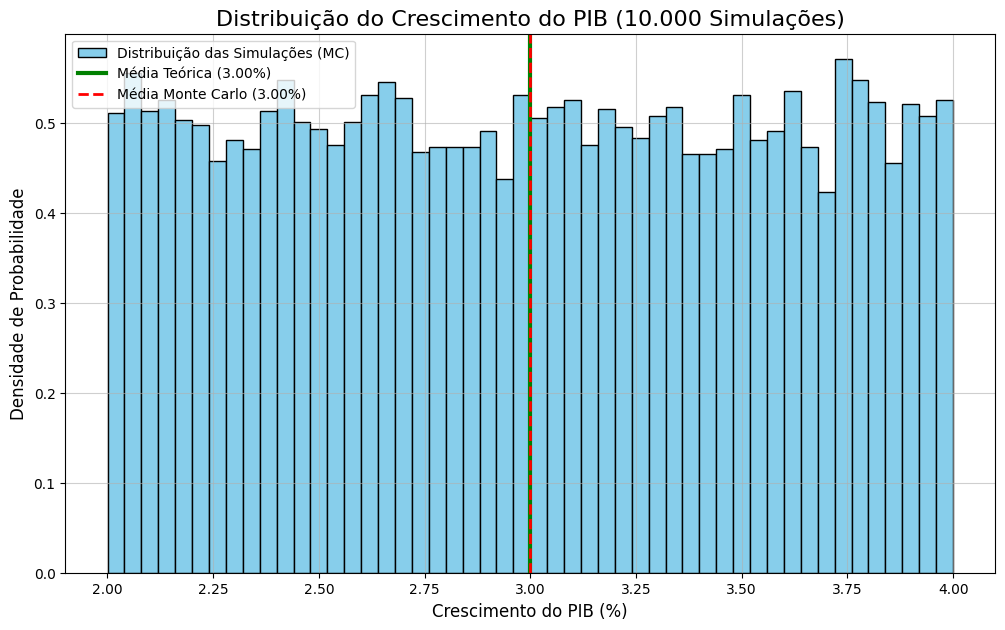


======================== CONCLUSÕES ========================

1. PRECISÃO:
   - Média: O método Divide & Conquer é EXATO (3.0000%) para este problema devido à simetria.
     O Monte Carlo é uma aproximação excelente, mas com pequena variação aleatória.
   - Desvio Padrão: Ambos os métodos fornecem aproximações muito próximas do valor teórico (0.5774%).

2. PERFORMANCE:
   - Ambos os métodos são extremamente rápidos, com tempos de execução muito baixos e comparáveis.

3. APLICABILIDADE:
   - Para este problema simples, Divide & Conquer é superior em precisão.
   - No entanto, Monte Carlo é uma ferramenta muito mais poderosa e flexível para problemas complexos,
     com múltiplas variáveis e incertezas, onde uma solução determinística seria inviável.



In [ ]:
plt.figure(figsize=(12, 7))
plt.hist(mc_amostras * 100, bins=50, density=True, color='skyblue', edgecolor='black', label='Distribuição das Simulações (MC)')

# Linhas para as médias e valores teóricos
plt.axvline(media_teorica * 100, color='green', linestyle='-', linewidth=3, label=f'Média Teórica ({media_teorica*100:.2f}%)')
plt.axvline(mc_media * 100, color='red', linestyle='--', linewidth=2, label=f'Média Monte Carlo ({mc_media*100:.2f}%)')

plt.title('Distribuição do Crescimento do PIB (10.000 Simulações)', fontsize=16)
plt.xlabel('Crescimento do PIB (%)', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

# Conclusões Finais
print("""
======================== CONCLUSÕES ========================

1. PRECISÃO:
   - Média: O método Divide & Conquer é EXATO (3.0000%) para este problema devido à simetria.
     O Monte Carlo é uma aproximação excelente, mas com pequena variação aleatória.
   - Desvio Padrão: Ambos os métodos fornecem aproximações muito próximas do valor teórico (0.5774%).

2. PERFORMANCE:
   - Ambos os métodos são extremamente rápidos, com tempos de execução muito baixos e comparáveis.

3. APLICABILIDADE:
   - Para este problema simples, Divide & Conquer é superior em precisão.
   - No entanto, Monte Carlo é uma ferramenta muito mais poderosa e flexível para problemas complexos,
     com múltiplas variáveis e incertezas, onde uma solução determinística seria inviável.
""")